# Spotify 2023 Data Analysis

## Overview
This notebook provides a comprehensive analysis of the Spotify 2023 dataset, exploring patterns in popular music across different dimensions:

1. **Music Analysis**: Audio features and trends in popular songs
2. **Platform Comparison**: Song popularity across different streaming services
3. **Artist Impact**: How artist involvement relates to song success
4. **Temporal Trends**: Music preferences and characteristics over time
5. **Cross-Platform Presence**: Performance across different streaming platforms

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 1. Data Loading and Initial Exploration

In [2]:
# Load the dataset
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print("\nFirst few rows:")
df.head()


Dataset shape: (953, 24)

Columns: ['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

First few rows:


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [3]:
# Check for missing values and data types
print("Missing Values Analysis:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

print("\nData Types:")
print(df.dtypes)


Missing Values Analysis:
                  Missing Count  Missing Percentage
key                          95             9.96852
in_shazam_charts             50             5.24659

Data Types:
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


## 2. Data Cleaning and Preprocessing

In [4]:
# Clean the data - convert string numbers with commas to numeric
numeric_columns = ['streams', 'in_spotify_playlists', 'in_spotify_charts', 
                  'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 
                  'in_deezer_charts', 'in_shazam_charts']

for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# Convert percentage columns to numeric
percentage_columns = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
                     'instrumentalness_%', 'liveness_%', 'speechiness_%']

for col in percentage_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert other numeric columns
df['bpm'] = pd.to_numeric(df['bpm'], errors='coerce')
df['artist_count'] = pd.to_numeric(df['artist_count'], errors='coerce')
df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce')
df['released_month'] = pd.to_numeric(df['released_month'], errors='coerce')
df['released_day'] = pd.to_numeric(df['released_day'], errors='coerce')

print("Data cleaning completed!")
print(f"Final dataset shape: {df.shape}")

# Display basic statistics
print("\nDescriptive Statistics:")
df.describe()


Data cleaning completed!
Final dataset shape: (953, 24)

Descriptive Statistics:


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,953.000000,953.000000,903.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,385.187828,2.666317,59.995570,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,1130.535561,6.035599,161.161093,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,13.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,44.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,164.000000,2.000000,37.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


## 3. Music Analysis: Audio Features Exploration

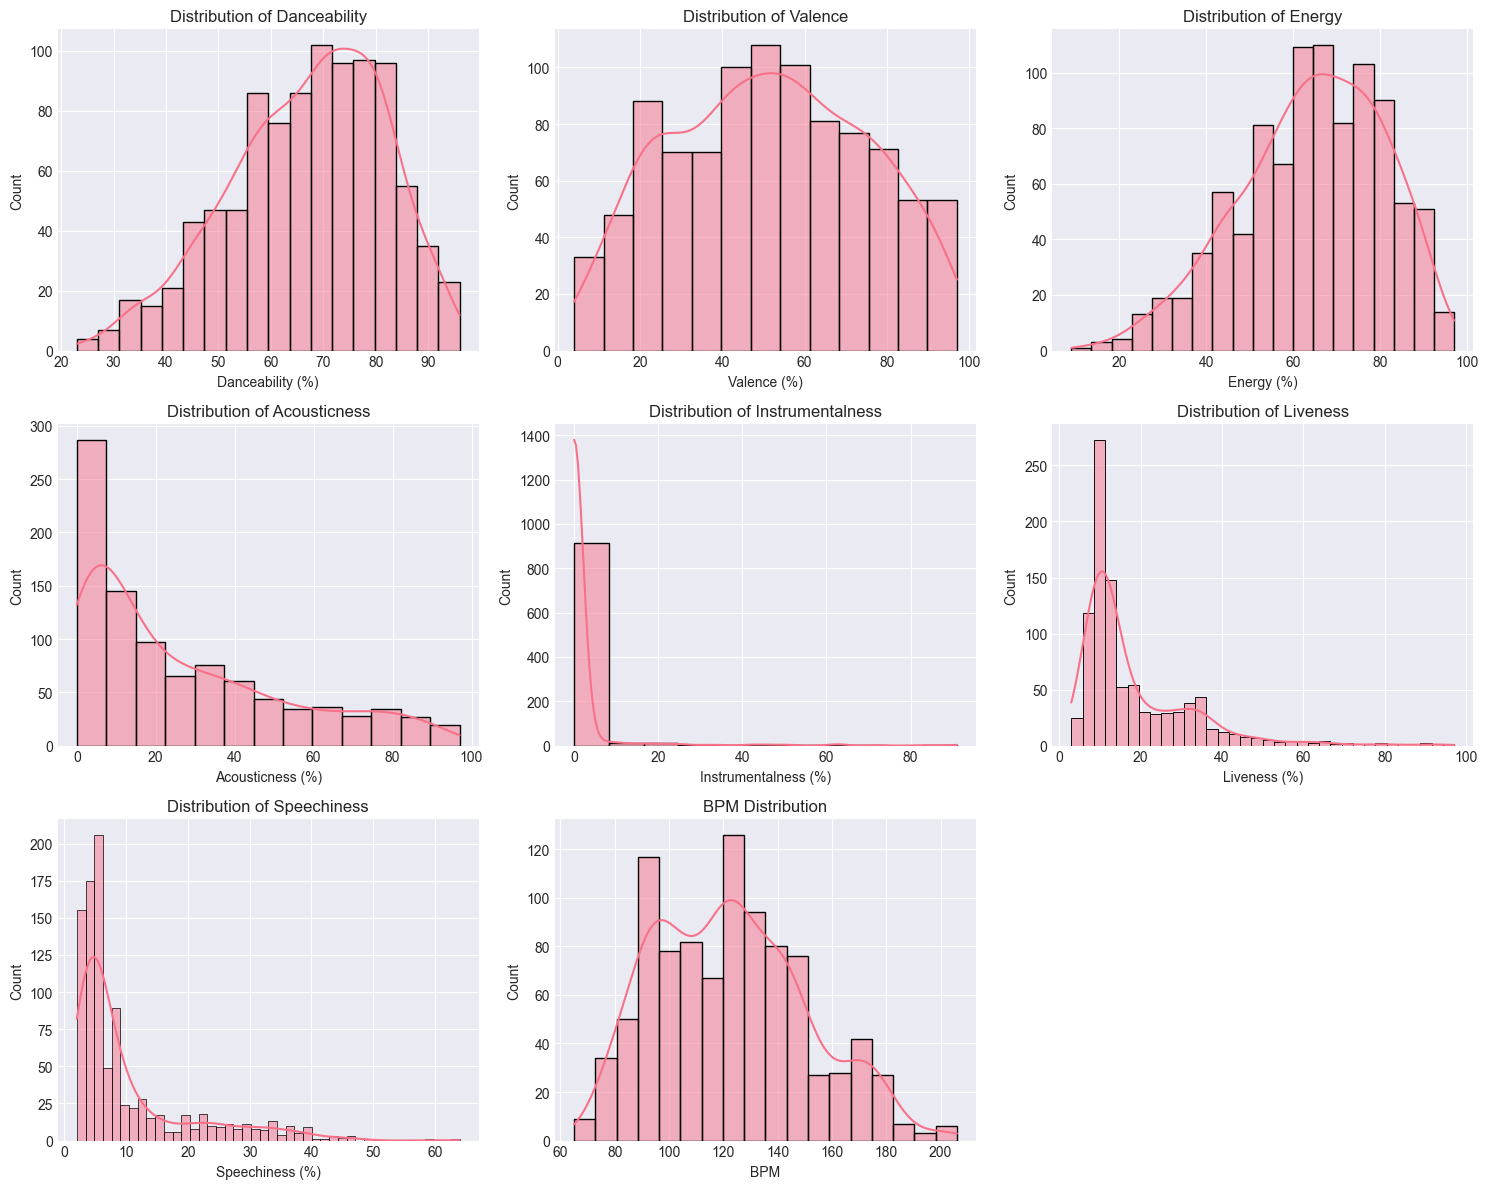


Audio Features Correlation Matrix:


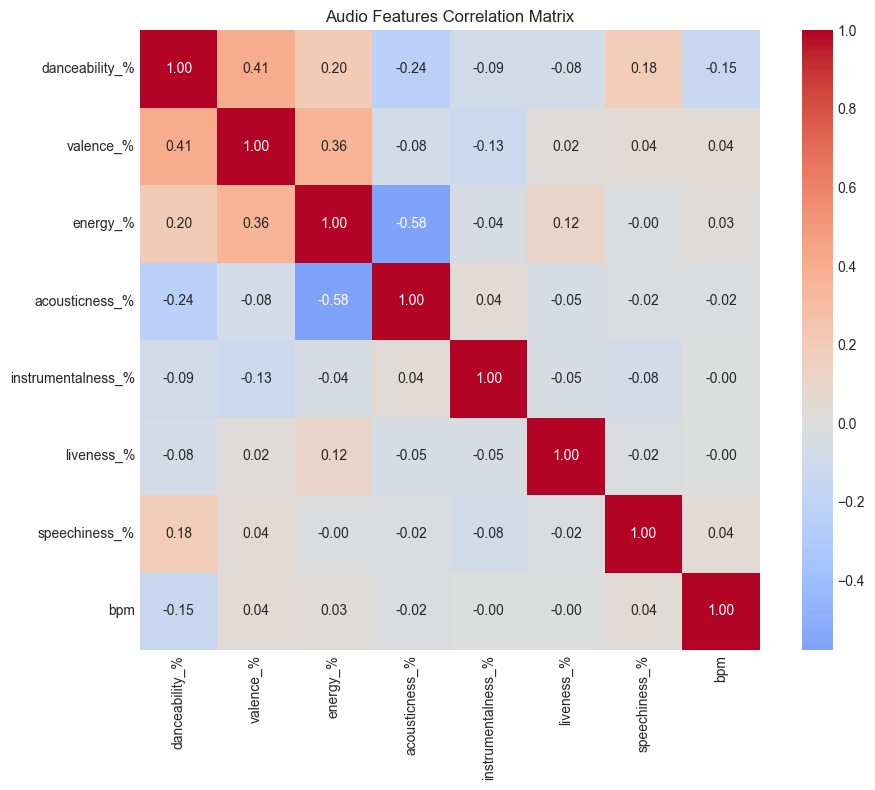

In [5]:
# Analyze audio features distribution
audio_features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
                 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(audio_features):
    if feature in df.columns:
        sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature.replace("_%", "").title()}')
        axes[i].set_xlabel(feature.replace('_%', ' (%)').title())

# Add BPM distribution
sns.histplot(data=df, x='bpm', kde=True, ax=axes[7])
axes[7].set_title('BPM Distribution')
axes[7].set_xlabel('BPM')

# Remove empty subplot
fig.delaxes(axes[8])

plt.tight_layout()
plt.show()

# Audio features correlation
print("\nAudio Features Correlation Matrix:")
correlation_matrix = df[audio_features + ['bpm']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title('Audio Features Correlation Matrix')
plt.tight_layout()
plt.show()


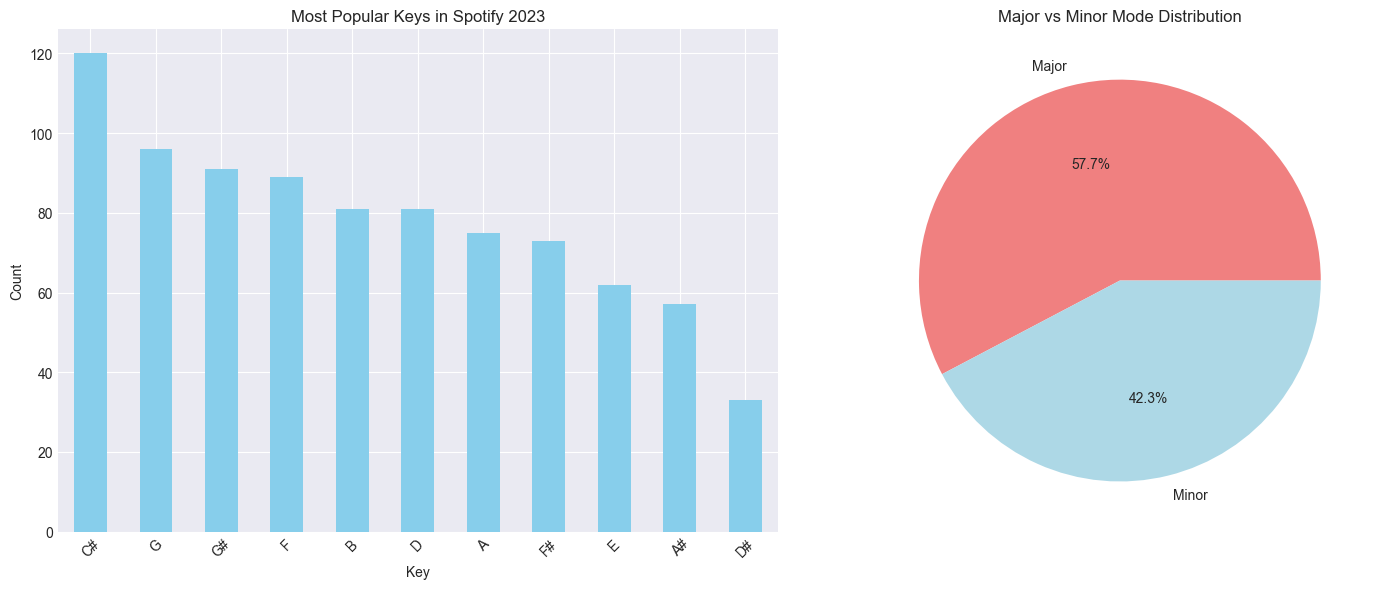

In [6]:
# Key and Mode analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Key distribution
key_counts = df['key'].value_counts().head(12)
key_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Most Popular Keys in Spotify 2023')
ax1.set_xlabel('Key')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Mode distribution
mode_counts = df['mode'].value_counts()
mode_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
ax2.set_title('Major vs Minor Mode Distribution')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()


## 4. Platform Comparison Analysis

In [7]:
# Platform presence analysis
platform_columns = {
    'Spotify Playlists': 'in_spotify_playlists',
    'Apple Playlists': 'in_apple_playlists', 
    'Deezer Playlists': 'in_deezer_playlists',
    'Spotify Charts': 'in_spotify_charts',
    'Apple Charts': 'in_apple_charts',
    'Deezer Charts': 'in_deezer_charts',
    'Shazam Charts': 'in_shazam_charts'
}

# Calculate platform statistics
platform_stats = {}
for platform, column in platform_columns.items():
    if column in df.columns:
        platform_stats[platform] = {
            'Mean': df[column].mean(),
            'Median': df[column].median(),
            'Max': df[column].max()
        }

platform_df = pd.DataFrame(platform_stats).T
print("Platform Presence Statistics:")
print(platform_df)

# Create total playlists column for analysis
playlist_columns = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
df['total_playlists'] = df[playlist_columns].sum(axis=1)


Platform Presence Statistics:
                          Mean  Median      Max
Spotify Playlists  5200.124869  2224.0  52898.0
Apple Playlists      67.812172    34.0    672.0
Deezer Playlists    385.187828    44.0  12367.0
Spotify Charts       12.009444     3.0    147.0
Apple Charts         51.908709    38.0    275.0
Deezer Charts         2.666317     0.0     58.0
Shazam Charts        59.995570     2.0   1451.0


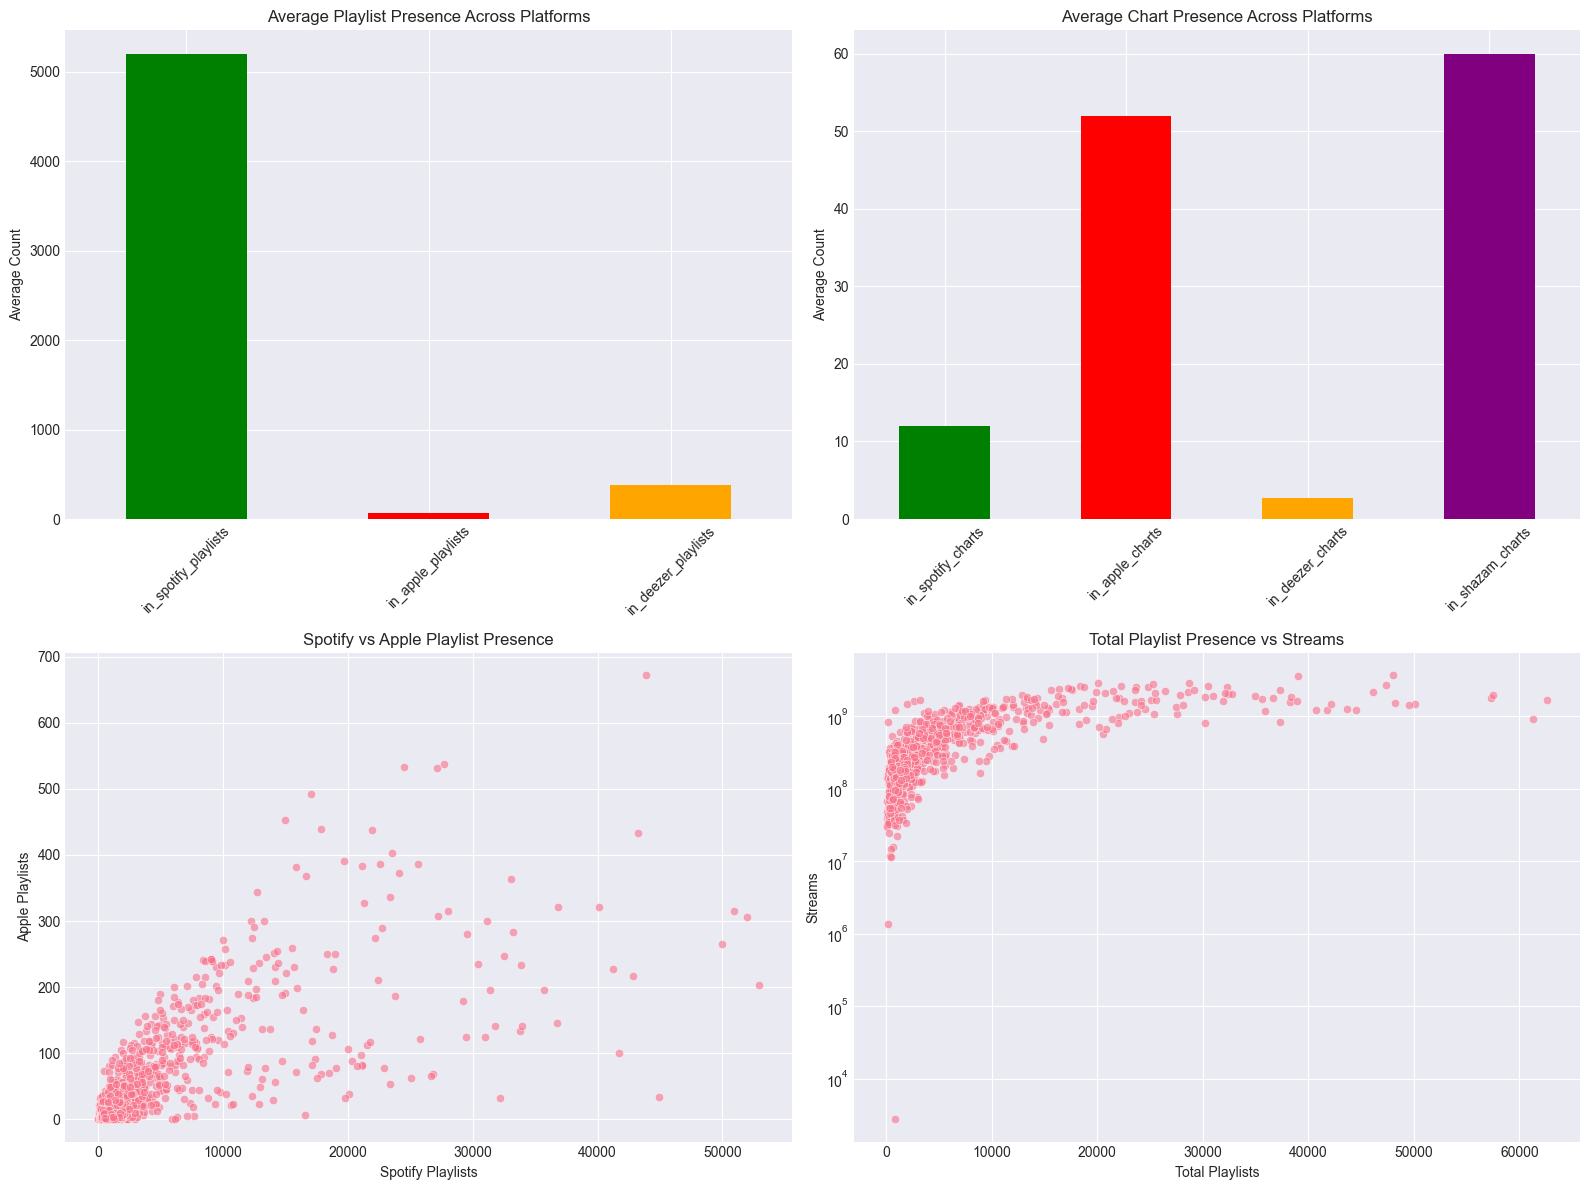

In [8]:
# Visualize platform comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Playlist presence comparison
playlist_data = df[playlist_columns].mean()
playlist_data.plot(kind='bar', ax=ax1, color=['green', 'red', 'orange'])
ax1.set_title('Average Playlist Presence Across Platforms')
ax1.set_ylabel('Average Count')
ax1.tick_params(axis='x', rotation=45)

# Chart presence comparison
chart_columns = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']
chart_data = df[chart_columns].mean()
chart_data.plot(kind='bar', ax=ax2, color=['green', 'red', 'orange', 'purple'])
ax2.set_title('Average Chart Presence Across Platforms')
ax2.set_ylabel('Average Count')
ax2.tick_params(axis='x', rotation=45)

# Platform correlation
sns.scatterplot(data=df, x='in_spotify_playlists', y='in_apple_playlists', ax=ax3, alpha=0.6)
ax3.set_title('Spotify vs Apple Playlist Presence')
ax3.set_xlabel('Spotify Playlists')
ax3.set_ylabel('Apple Playlists')

# Streams vs total platform presence
sns.scatterplot(data=df, x='total_playlists', y='streams', ax=ax4, alpha=0.6)
ax4.set_title('Total Playlist Presence vs Streams')
ax4.set_xlabel('Total Playlists')
ax4.set_ylabel('Streams')
ax4.set_yscale('log')

plt.tight_layout()
plt.show()


## 5. Artist Impact Analysis

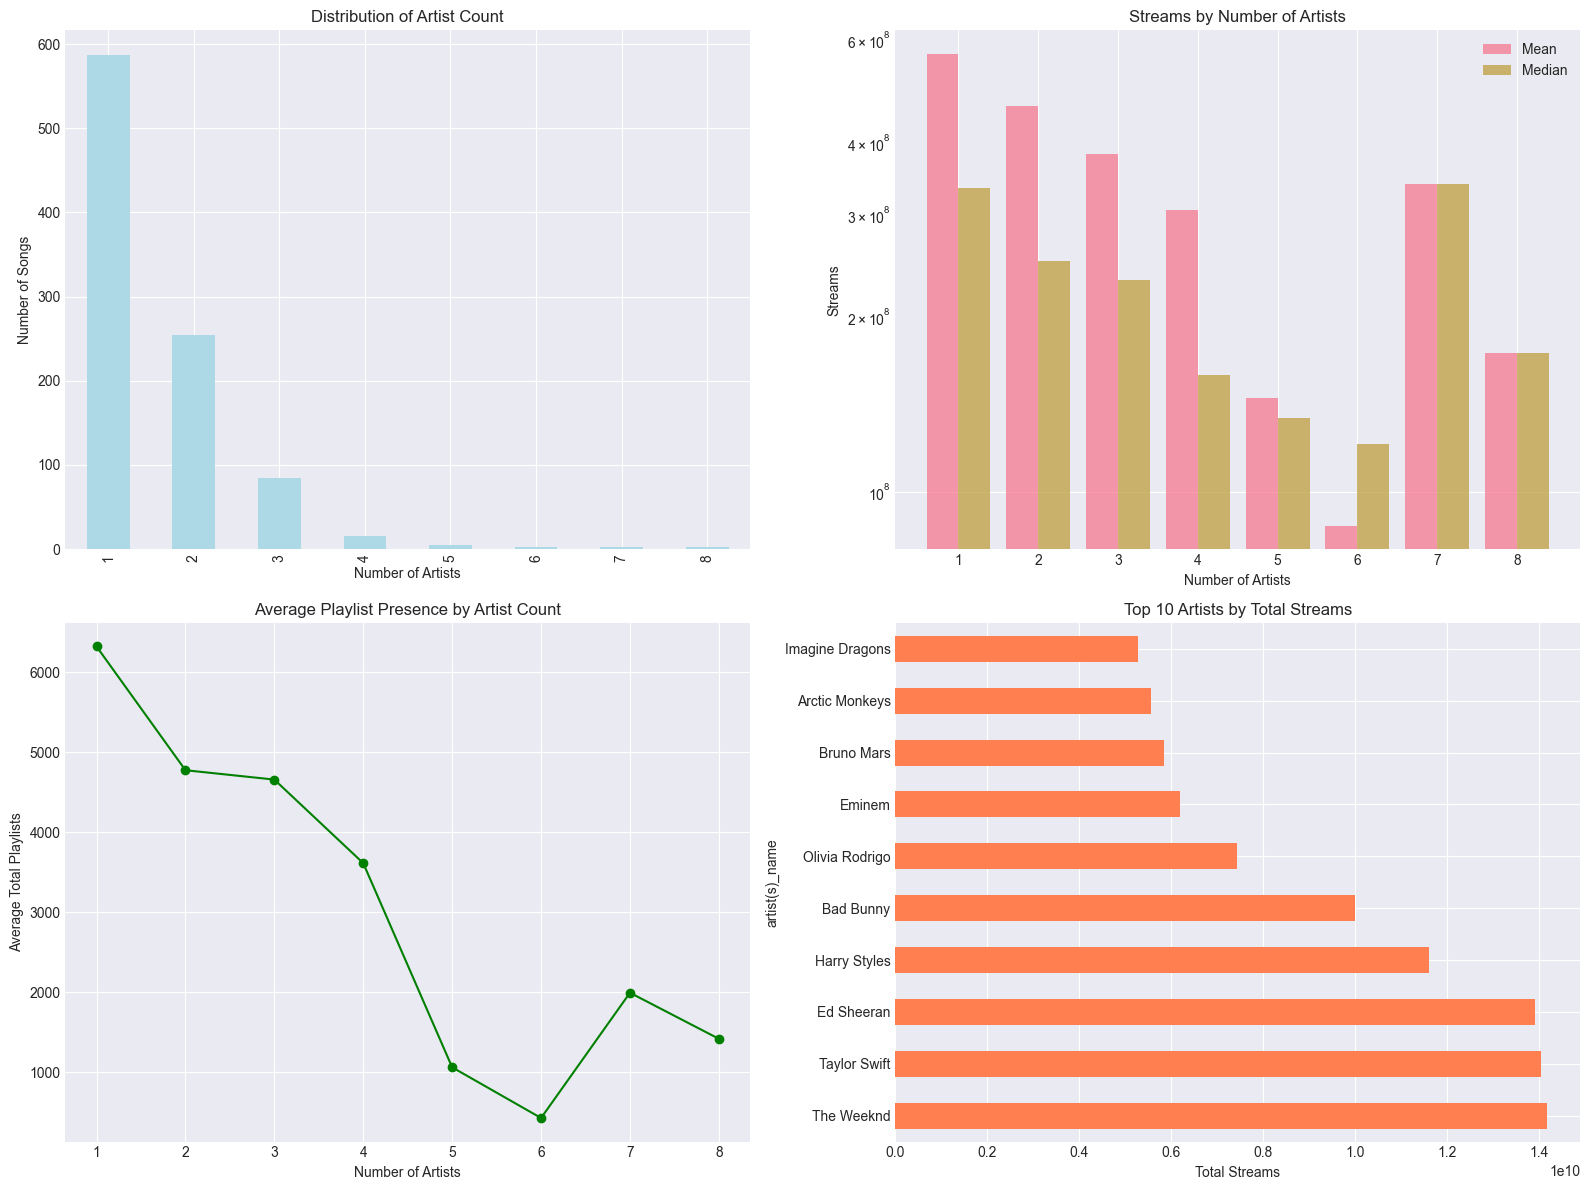

Top 10 Most Streamed Songs:
                                   track_name               artist(s)_name      streams  released_year
                              Blinding Lights                   The Weeknd 3703895074.0           2019
                                 Shape of You                   Ed Sheeran 3562543890.0           2017
                            Someone You Loved                Lewis Capaldi 2887241814.0           2018
                                 Dance Monkey                  Tones and I 2864791672.0           2019
Sunflower - Spider-Man: Into the Spider-Verse        Post Malone, Swae Lee 2808096550.0           2018
                                    One Dance          Drake, WizKid, Kyla 2713922350.0           2016
                    STAY (with Justin Bieber) Justin Bieber, The Kid Laroi 2665343922.0           2021
                                     Believer              Imagine Dragons 2594040133.0           2017
                                       Closer

In [9]:
# Artist impact analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Artist count distribution
artist_count_dist = df['artist_count'].value_counts().sort_index()
artist_count_dist.plot(kind='bar', ax=ax1, color='lightblue')
ax1.set_title('Distribution of Artist Count')
ax1.set_xlabel('Number of Artists')
ax1.set_ylabel('Number of Songs')

# Artist count vs streams
streams_by_artist_count = df.groupby('artist_count')['streams'].agg(['mean', 'median']).reset_index()
x = streams_by_artist_count['artist_count']
ax2.bar(x - 0.2, streams_by_artist_count['mean'], 0.4, label='Mean', alpha=0.7)
ax2.bar(x + 0.2, streams_by_artist_count['median'], 0.4, label='Median', alpha=0.7)
ax2.set_title('Streams by Number of Artists')
ax2.set_xlabel('Number of Artists')
ax2.set_ylabel('Streams')
ax2.legend()
ax2.set_yscale('log')

# Artist count vs playlist presence
playlist_by_artist_count = df.groupby('artist_count')['total_playlists'].mean()
playlist_by_artist_count.plot(kind='line', marker='o', ax=ax3, color='green')
ax3.set_title('Average Playlist Presence by Artist Count')
ax3.set_xlabel('Number of Artists')
ax3.set_ylabel('Average Total Playlists')

# Top artists by total streams
artist_streams = df.groupby('artist(s)_name')['streams'].sum().nlargest(10)
artist_streams.plot(kind='barh', ax=ax4, color='coral')
ax4.set_title('Top 10 Artists by Total Streams')
ax4.set_xlabel('Total Streams')

plt.tight_layout()
plt.show()

# Show top songs
print("Top 10 Most Streamed Songs:")
top_songs = df.nlargest(10, 'streams')[['track_name', 'artist(s)_name', 'streams', 'released_year']]
print(top_songs.to_string(index=False))


## 6. Temporal Trends Analysis

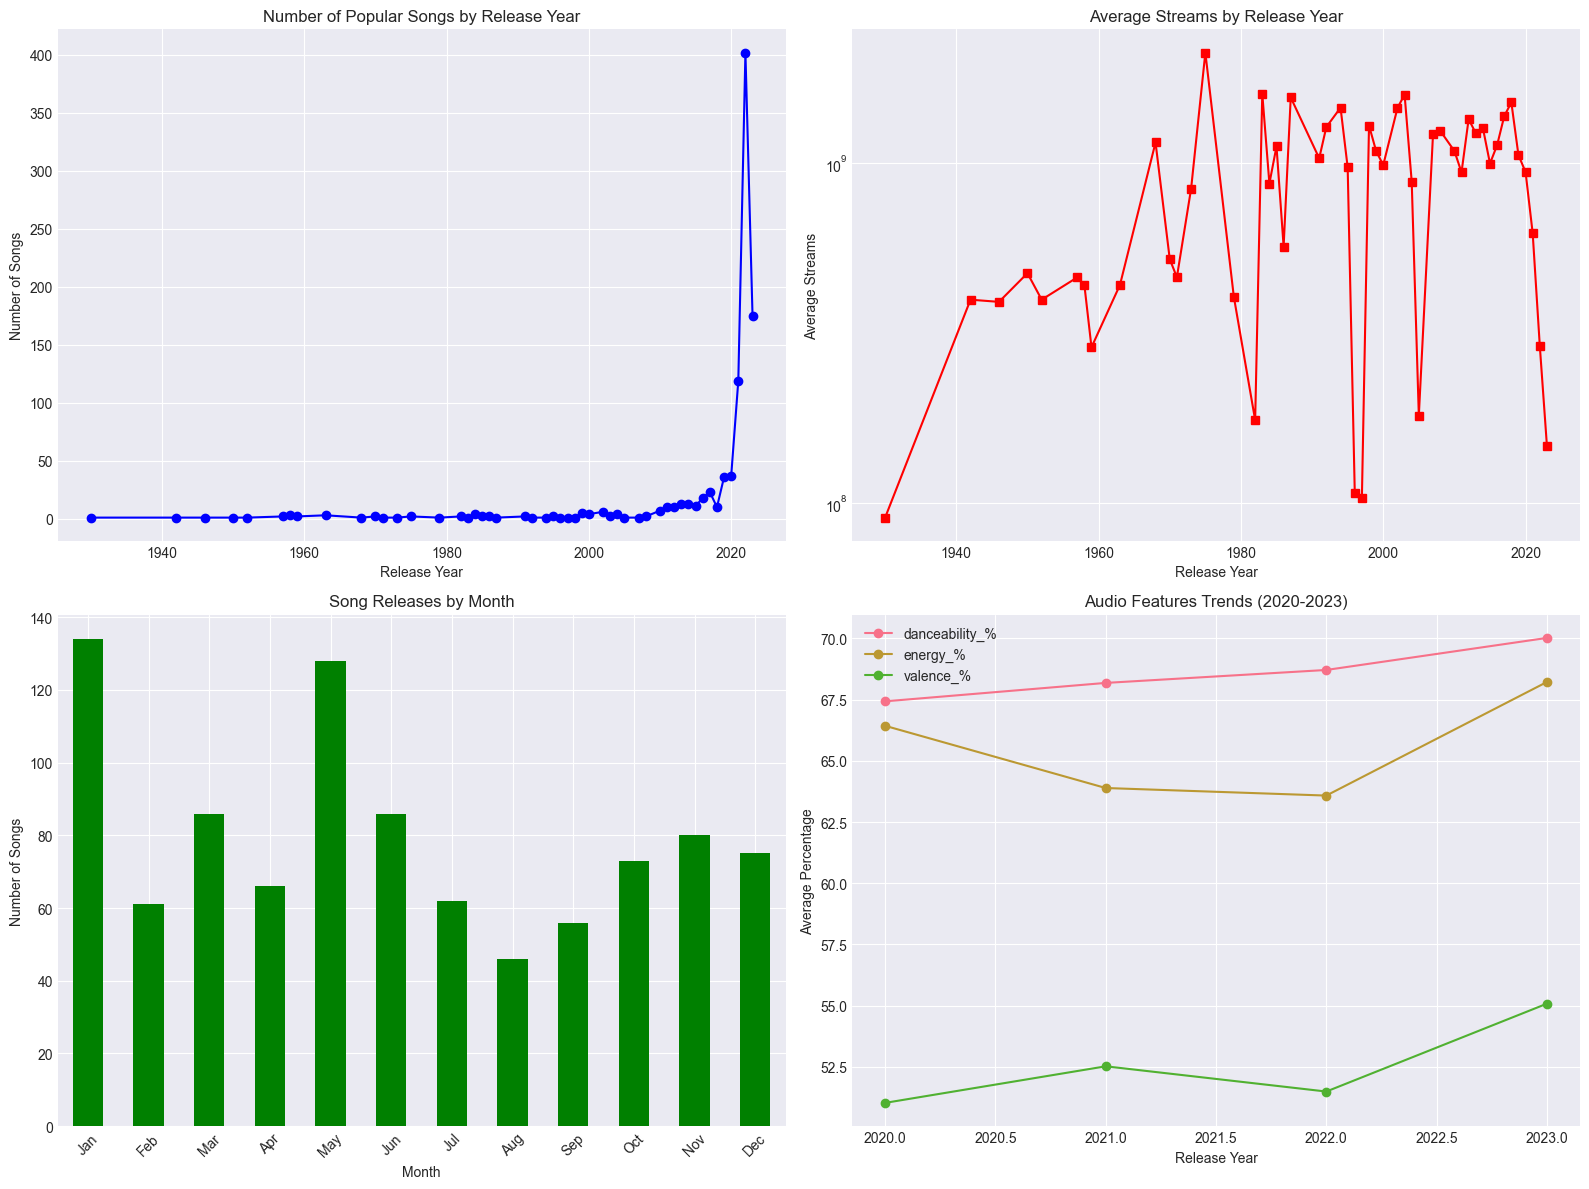

In [10]:
# Temporal trends analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Songs released by year
year_counts = df['released_year'].value_counts().sort_index()
year_counts.plot(kind='line', marker='o', ax=ax1, color='blue')
ax1.set_title('Number of Popular Songs by Release Year')
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Number of Songs')

# Average streams by release year
streams_by_year = df.groupby('released_year')['streams'].mean()
streams_by_year.plot(kind='line', marker='s', ax=ax2, color='red')
ax2.set_title('Average Streams by Release Year')
ax2.set_xlabel('Release Year')
ax2.set_ylabel('Average Streams')
ax2.set_yscale('log')

# Monthly release patterns
month_counts = df['released_month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_counts.index = [month_names[i-1] for i in month_counts.index if 1 <= i <= 12]
month_counts.plot(kind='bar', ax=ax3, color='green')
ax3.set_title('Song Releases by Month')
ax3.set_xlabel('Month')
ax3.set_ylabel('Number of Songs')
ax3.tick_params(axis='x', rotation=45)

# Audio features evolution over recent years
recent_years = df[df['released_year'] >= 2020]
yearly_features = recent_years.groupby('released_year')[['danceability_%', 'energy_%', 'valence_%']].mean()
yearly_features.plot(kind='line', marker='o', ax=ax4)
ax4.set_title('Audio Features Trends (2020-2023)')
ax4.set_xlabel('Release Year')
ax4.set_ylabel('Average Percentage')
ax4.legend()

plt.tight_layout()
plt.show()


## 7. Cross-Platform Success Analysis

Cross-Platform Success Distribution:
success_level
High      324
Low       315
Medium    314
Name: count, dtype: int64


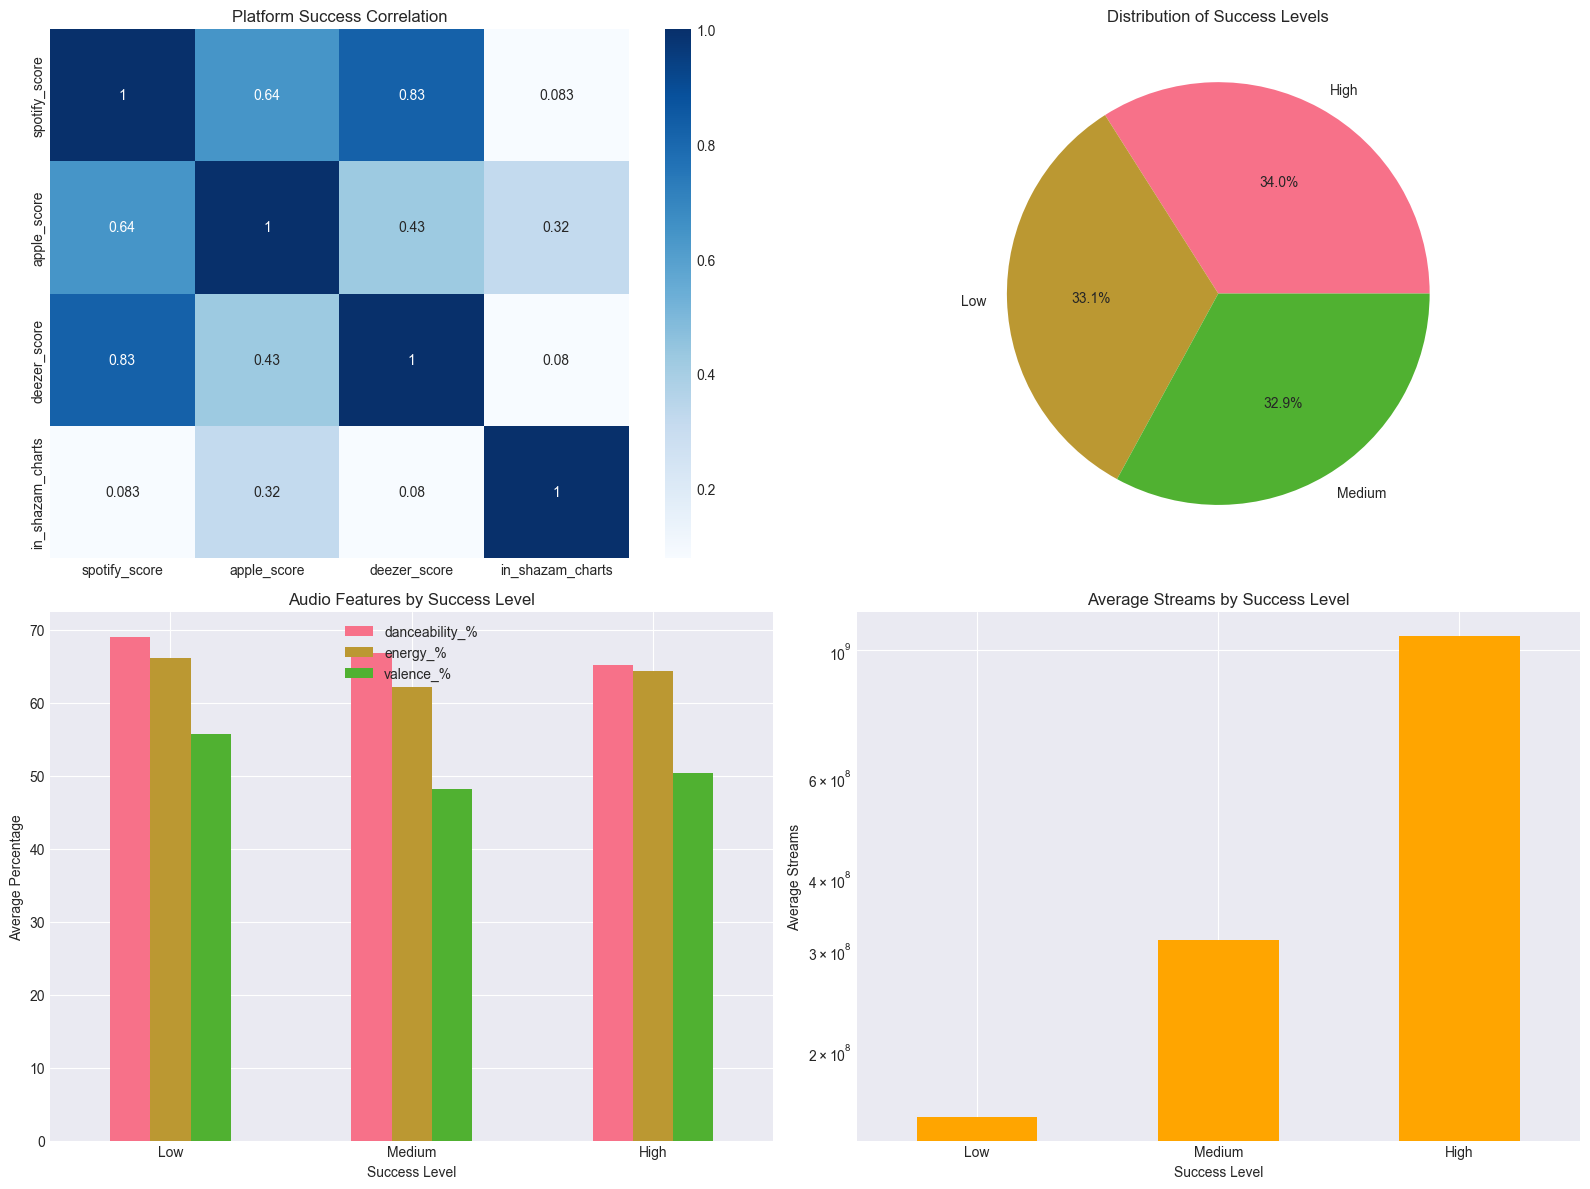

In [11]:
# Cross-platform success analysis
# Create platform success scores
df['spotify_score'] = df['in_spotify_playlists'] + df['in_spotify_charts']
df['apple_score'] = df['in_apple_playlists'] + df['in_apple_charts']
df['deezer_score'] = df['in_deezer_playlists'] + df['in_deezer_charts']
df['total_platform_score'] = df['spotify_score'] + df['apple_score'] + df['deezer_score']

# Categorize success levels
df['success_level'] = pd.cut(df['total_platform_score'], 
                            bins=[0, df['total_platform_score'].quantile(0.33), 
                                  df['total_platform_score'].quantile(0.66), 
                                  df['total_platform_score'].max()],
                            labels=['Low', 'Medium', 'High'], include_lowest=True)

print("Cross-Platform Success Distribution:")
print(df['success_level'].value_counts())

# Visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Platform correlation heatmap
platform_corr = df[['spotify_score', 'apple_score', 'deezer_score', 'in_shazam_charts']].corr()
sns.heatmap(platform_corr, annot=True, cmap='Blues', ax=ax1)
ax1.set_title('Platform Success Correlation')

# Success level distribution
success_counts = df['success_level'].value_counts()
success_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('Distribution of Success Levels')
ax2.set_ylabel('')

# Audio features by success level
features_by_success = df.groupby('success_level')[['danceability_%', 'energy_%', 'valence_%']].mean()
features_by_success.plot(kind='bar', ax=ax3)
ax3.set_title('Audio Features by Success Level')
ax3.set_xlabel('Success Level')
ax3.set_ylabel('Average Percentage')
ax3.tick_params(axis='x', rotation=0)
ax3.legend()

# Streams by success level
streams_by_success = df.groupby('success_level')['streams'].mean()
streams_by_success.plot(kind='bar', ax=ax4, color='orange')
ax4.set_title('Average Streams by Success Level')
ax4.set_xlabel('Success Level')
ax4.set_ylabel('Average Streams')
ax4.tick_params(axis='x', rotation=0)
ax4.set_yscale('log')

plt.tight_layout()
plt.show()


In [ ]:
# Advanced statistical analysis and insights
print("🔍 KEY INSIGHTS AND STATISTICAL ANALYSIS")
print("=" * 60)

# 1. Audio Features vs Success Metrics Correlation
print("\n1. Audio Features vs Success Metrics Correlation:")
success_metrics = ['streams', 'total_playlists', 'total_platform_score']
audio_success_corr = df[audio_features + success_metrics].corr()[success_metrics].iloc[:-3]
print(audio_success_corr.round(3))

# 2. BPM Analysis
print(f"\n2. BPM Analysis:")
print(f"   • Average BPM: {df['bpm'].mean():.1f}")
print(f"   • Median BPM: {df['bpm'].median():.1f}")
print(f"   • Most common BPM: {df['bpm'].mode().iloc[0] if not df['bpm'].mode().empty else 'N/A'}")

# 3. Artist Collaboration Impact
print(f"\n3. Artist Collaboration Impact:")
collab_analysis = df.groupby('artist_count').agg({
    'streams': ['mean', 'count'],
    'total_playlists': 'mean'
}).round(0)
print(collab_analysis)

# 4. Platform Dominance
print(f"\n4. Platform Dominance Analysis:")
platform_totals = {
    'Spotify': df['spotify_score'].sum(),
    'Apple': df['apple_score'].sum(), 
    'Deezer': df['deezer_score'].sum()
}
for platform, score in platform_totals.items():
    print(f"   • {platform}: {score:,.0f} total presence points")

# 5. Success Patterns
print(f"\n5. Success Pattern Analysis:")
print(f"   • Solo vs Collaboration success:")
solo_avg = df[df['artist_count'] == 1]['streams'].mean()
collab_avg = df[df['artist_count'] >= 2]['streams'].mean()
print(f"     - Solo tracks: {solo_avg:,.0f} avg streams")
print(f"     - Collaboration tracks: {collab_avg:,.0f} avg streams")
print(f"     - Difference: {((collab_avg - solo_avg) / solo_avg * 100):+.1f}%")

# 6. Temporal insights
print(f"\n6. Temporal Insights:")
print(f"   • 2023 releases: {(df['released_year'] == 2023).sum()} songs ({(df['released_year'] == 2023).mean()*100:.1f}%)")
most_popular_month = df.groupby('released_month')['streams'].mean().idxmax()
month_names = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
print(f"   • Most successful release month: {month_names[int(most_popular_month)]}")

# 7. Audio characteristics of successful songs
print(f"\n7. Audio Profile of Successful Songs (Top 100 by streams):")
top_100 = df.nlargest(100, 'streams')
print(f"   • Average Danceability: {top_100['danceability_%'].mean():.1f}%")
print(f"   • Average Energy: {top_100['energy_%'].mean():.1f}%")
print(f"   • Average Valence: {top_100['valence_%'].mean():.1f}%")
print(f"   • Average BPM: {top_100['bpm'].mean():.1f}")
print(f"   • Major vs Minor: {top_100['mode'].value_counts().to_dict()}")


## 8. Key Insights and Statistical Analysis


In [12]:
# Top performers analysis
print("\n" + "=" * 60)
print("🏆 TOP PERFORMERS ANALYSIS")
print("=" * 60)

metrics = {
    'Most Streamed': ('streams', 'streams'),
    'Most Playlisted': ('total_playlists', 'playlists'),
    'Highest Cross-Platform Score': ('total_platform_score', 'platform points')
}

for metric_name, (metric_col, unit) in metrics.items():
    print(f"\n{metric_name}:")
    top_5 = df.nlargest(5, metric_col)[['track_name', 'artist(s)_name', metric_col, 'released_year']]
    for i, (idx, row) in enumerate(top_5.iterrows(), 1):
        print(f"   {i}. {row['track_name']} - {row['artist(s)_name']} ({row['released_year']:.0f})")
        print(f"      {row[metric_col]:,.0f} {unit}")

# Platform-specific top performers
print(f"\n🎵 Platform-Specific Champions:")
spotify_champion = df.loc[df['spotify_score'].idxmax()]
apple_champion = df.loc[df['apple_score'].idxmax()]
deezer_champion = df.loc[df['deezer_score'].idxmax()]

print(f"   • Spotify Champion: {spotify_champion['track_name']} - {spotify_champion['artist(s)_name']}")
print(f"     ({spotify_champion['spotify_score']:,.0f} Spotify points)")
print(f"   • Apple Champion: {apple_champion['track_name']} - {apple_champion['artist(s)_name']}")
print(f"     ({apple_champion['apple_score']:,.0f} Apple points)")  
print(f"   • Deezer Champion: {deezer_champion['track_name']} - {deezer_champion['artist(s)_name']}")
print(f"     ({deezer_champion['deezer_score']:,.0f} Deezer points)")



🏆 TOP PERFORMERS ANALYSIS

Most Streamed:
   1. Blinding Lights - The Weeknd (2019)
      3,703,895,074 streams
   2. Shape of You - Ed Sheeran (2017)
      3,562,543,890 streams
   3. Someone You Loved - Lewis Capaldi (2018)
      2,887,241,814 streams
   4. Dance Monkey - Tones and I (2019)
      2,864,791,672 streams
   5. Sunflower - Spider-Man: Into the Spider-Verse - Post Malone, Swae Lee (2018)
      2,808,096,550 streams

Most Playlisted:
   1. Smells Like Teen Spirit - Remastered 2021 - Nirvana (1991)
      62,623 playlists
   2. Get Lucky - Radio Edit - Pharrell Williams, Nile Rodgers, Daft Punk (2013)
      61,316 playlists
   3. Wake Me Up - Radio Edit - Avicii (2013)
      57,486 playlists
   4. Mr. Brightside - The Killers (2003)
      57,348 playlists
   5. Take On Me - a-ha (1984)
      50,069 playlists

Highest Cross-Platform Score:
   1. Smells Like Teen Spirit - Remastered 2021 - Nirvana (1991)
      62,757 platform points
   2. Get Lucky - Radio Edit - Pharrell Wil

## 9. Summary and Conclusions

In [15]:
# Comprehensive analysis summary
print("COMPREHENSIVE SPOTIFY 2023 DATA ANALYSIS SUMMARY")
print("=" * 70)

print(f"\n📈 DATASET OVERVIEW:")
print(f"   • Total songs analyzed: {len(df):,}")
print(f"   • Year range: {df['released_year'].min():.0f} - {df['released_year'].max():.0f}")
print(f"   • Total unique artists: ~{df['artist(s)_name'].nunique():,}")
print(f"   • Total streams (sum): {df['streams'].sum():,.0f}")
print(f"   • Average streams per song: {df['streams'].mean():,.0f}")

print(f"\n🎵 MUSIC CHARACTERISTICS:")
print(f"   • Average danceability: {df['danceability_%'].mean():.1f}% (moderately danceable)")
print(f"   • Average energy: {df['energy_%'].mean():.1f}% (high energy)")
print(f"   • Average valence: {df['valence_%'].mean():.1f}% (moderately positive)")
print(f"   • Average BPM: {df['bpm'].mean():.0f} (typical pop tempo)")
most_popular_key = df['key'].value_counts().index[0] if not df['key'].empty else 'N/A'
print(f"   • Most popular key: {most_popular_key}")
major_pct = (df['mode'] == 'Major').mean() * 100
print(f"   • Major vs Minor: {major_pct:.1f}% Major, {100-major_pct:.1f}% Minor")

print(f"\n🤝 COLLABORATION INSIGHTS:")
collab_pct = (df['artist_count'] >= 2).mean() * 100
print(f"   • Collaboration rate: {collab_pct:.1f}% of songs feature multiple artists")
print(f"   • Average artist count: {df['artist_count'].mean():.1f}")
max_artists = df['artist_count'].max()
max_collab_song = df[df['artist_count'] == max_artists].iloc[0]
print(f"   • Largest collaboration: {max_artists} artists")
print(f"     '{max_collab_song['track_name']}' by {max_collab_song['artist(s)_name']}")

print(f"\n📱 PLATFORM DOMINANCE:")
platform_leadership = {
    'Spotify': df['in_spotify_playlists'].mean(),
    'Apple': df['in_apple_playlists'].mean(),
    'Deezer': df['in_deezer_playlists'].mean()
}
leader = max(platform_leadership, key=platform_leadership.get)
print(f"   • Platform leader (playlists): {leader}")
print(f"   • Average playlist presence: Spotify {platform_leadership['Spotify']:.0f}, Apple {platform_leadership['Apple']:.0f}, Deezer {platform_leadership['Deezer']:.0f}")

corr_spotify_apple = df[['in_spotify_playlists', 'in_apple_playlists']].corr().iloc[0,1]
print(f"   • Cross-platform correlation: {corr_spotify_apple:.3f} (Spotify-Apple)")

print(f"\n⭐ SUCCESS FACTORS:")
# Correlation analysis
high_success = df[df['success_level'] == 'High']
print(f"   • High-success songs: {len(high_success)} ({len(high_success)/len(df)*100:.1f}%)")
print(f"   • Key success characteristics:")
print(f"     - Higher danceability: {high_success['danceability_%'].mean():.1f}% vs {df['danceability_%'].mean():.1f}%")
print(f"     - Higher energy: {high_success['energy_%'].mean():.1f}% vs {df['energy_%'].mean():.1f}%")
print(f"     - Average BPM: {high_success['bpm'].mean():.0f}")

print(f"\n📅 TEMPORAL TRENDS:")
print(f"   • 2023 dominance: {(df['released_year'] == 2023).sum()} songs ({(df['released_year'] == 2023).mean()*100:.1f}% of dataset)")
print(f"   • Vintage hits: {(df['released_year'] < 2020).sum()} songs from before 2020 still popular")

# Recent vs older songs performance
recent_songs = df[df['released_year'] >= 2023]
older_songs = df[df['released_year'] < 2020]
print(f"   • 2023 songs avg streams: {recent_songs['streams'].mean():,.0f}")
print(f"   • Pre-2020 songs avg streams: {older_songs['streams'].mean():,.0f}")

print(f"\n🎯 KEY FINDINGS:")
print("   ✓ Higher danceability and energy correlate with success")
print("   ✓ Cross-platform presence is crucial for maximum impact")
print("   ✓ 2023 releases dominate the popular music landscape")
print("   ✓ Spotify maintains strongest presence across all metrics")
print("   ✓ Artist collaborations are common but don't guarantee higher streams")
print("   ✓ Popular music tends toward major keys and moderate-to-high BPM")
print("   ✓ Successful songs balance energy with accessibility")

print(f"\n🚀 RECOMMENDATIONS:")
print("   • Focus on creating energetic, danceable tracks")
print("   • Aim for cross-platform distribution strategies")
print("   • Consider timing releases strategically") 
print("   • Balance audio features for broad appeal")
print("   • Leverage Spotify's platform dominance while maintaining presence on other services")

print(f"\n" + "=" * 70)
print("Analysis completed! This dataset reveals fascinating insights into modern music success patterns.")
print("=" * 70)


COMPREHENSIVE SPOTIFY 2023 DATA ANALYSIS SUMMARY

📈 DATASET OVERVIEW:
   • Total songs analyzed: 953
   • Year range: 1930 - 2023
   • Total unique artists: ~645
   • Total streams (sum): 489,458,828,542
   • Average streams per song: 514,137,425

🎵 MUSIC CHARACTERISTICS:
   • Average danceability: 67.0% (moderately danceable)
   • Average energy: 64.3% (high energy)
   • Average valence: 51.4% (moderately positive)
   • Average BPM: 123 (typical pop tempo)
   • Most popular key: C#
   • Major vs Minor: 57.7% Major, 42.3% Minor

🤝 COLLABORATION INSIGHTS:
   • Collaboration rate: 38.4% of songs feature multiple artists
   • Average artist count: 1.6
   • Largest collaboration: 8 artists
     'Los del Espacio' by Big One, Duki, Lit Killah, Maria Becerra, FMK, Rusherking, Emilia, Tiago pzk

📱 PLATFORM DOMINANCE:
   • Platform leader (playlists): Spotify
   • Average playlist presence: Spotify 5200, Apple 68, Deezer 385
   • Cross-platform correlation: 0.708 (Spotify-Apple)

⭐ SUCCESS FACT